In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Retrieve saved peak data in to a dataframe
Peak_df = pd.read_csv('Peak_data_db.csv', index_col=0)

### Answer the following questions and create the described graphs

#### How many countries are listed?

In [3]:
print('The number of listed countries is:', Peak_df['Country:'].nunique())

The number of listed countries is: 126


#### Which mountains from Israel are listed?

In [7]:
IL_peaks = Peak_df[Peak_df['Country:']=='Israel'].index
print('Mountains in Israel listed:')
for peaks in IL_peaks:
    print(peaks)

Mountains in Israel listed:
Mount Carmel
Har Meron
Masada


#### Make a histogram of the peaks heights in Europe.

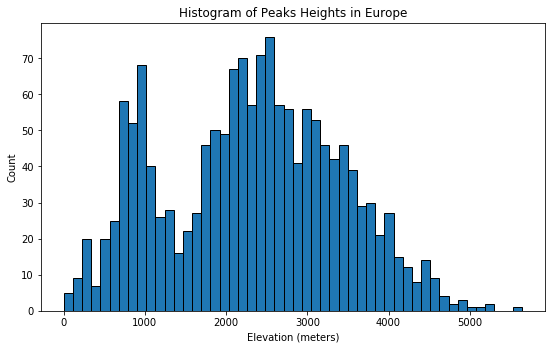

In [14]:
height_peaks_europe = Peak_df[Peak_df['Continent:']=='Europe']['Elevation (meters):']
# Create Figure (empty canvas)
fig = plt.figure(figsize=(7,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1])

# Plot on that set of axes
# axes.hist(height_peaks_europe)#, )
axes.set_xlabel('Elevation (meters)')
axes.set_ylabel('Count')
axes.set_title('Histogram of Peaks Heights in Europe')
height_peaks_europe.hist(ax=axes,grid=False,bins=50,edgecolor='k')

#### Which country has the highest number of peaks above 6000m?

In [13]:
peak_gt_6k = Peak_df[Peak_df['Elevation (meters):'] > 6000]
count_by_country_peak_gt_6k = peak_gt_6k['Country:'].value_counts()
country_max_num_peaks_gt_6k = count_by_country_peak_gt_6k.index[0]
print(country_max_num_peaks_gt_6k,
      'has the highest number of peaks above 6000m')

Nepal has the highest number of peaks above 6000m


#### Make a pie chart for the number of peaks in each continent.

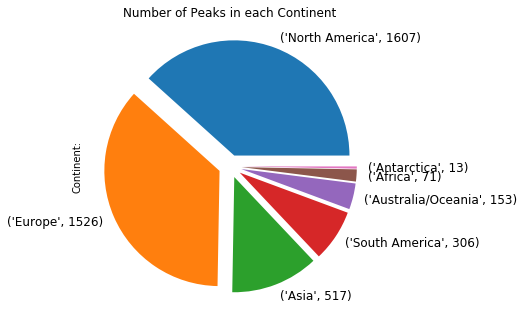

In [98]:
num_peaks_per_continent = Peak_df['Continent:'].value_counts()

# Create Figure (empty canvas)
fig1 = plt.figure(figsize=(4,4))

# Add set of axes to figure
axes1 = fig1.add_axes([0, 0, 1, 1])
explode=[0.1]*len(num_peaks_per_continent)

# Create labels by zipping continent names with number of peaks 
continents=Peak_df['Continent:'].value_counts().index
num_of_peaks=[int(i) for i in Peak_df['Continent:'].value_counts().tolist()]
labels=list(zip(continents,num_of_peaks))

# Plot on that set of axes
axes1.set_title('Number of Peaks in each Continent')
num_peaks_per_continent.plot.pie(ax=axes1,
                                 fontsize=12,
                                 labels=labels,
                                 explode=explode)

#### Sort the continents by their average peak height

In [3]:
Peak_df.groupby(
    'Continent:')['Elevation (meters):'].mean().sort_values(ascending=False)

Continent:
Asia                 4769.348862
South America        4374.514584
Africa               3230.326208
North America        2577.486982
Antarctica           2546.158523
Europe               2318.148400
Australia/Oceania    1840.049526
Name: Elevation (meters):, dtype: float64

#### Find the highest mountain in each continent

In [15]:
name_highest_mountain_per_continent = Peak_df.groupby(
    'Continent:')['Elevation (meters):'].idxmax()
name_highest_mountain_per_continent

Continent:
Africa               Mount Kilimanjaro
Antarctica               Vinson Massif
Asia                     Mount Everest
Australia/Oceania          Puncak Jaya
Europe                    Mount Elbrus
North America                   Denali
South America                Aconcagua
Name: Elevation (meters):, dtype: object

In [16]:
elevation_highest_mountain_per_continent = Peak_df.groupby(
    'Continent:')['Elevation (meters):'].max()
elevation_highest_mountain_per_continent

Continent:
Africa               5894.8320
Antarctica           4896.9168
Asia                 8849.8680
Australia/Oceania    4883.8104
Europe               5641.8480
North America        6193.5360
South America        6961.9368
Name: Elevation (meters):, dtype: float64

In [17]:
details_highest_mountains_per_continent = Peak_df.loc[
    name_highest_mountain_per_continent]
details_highest_mountains_per_continent

,Best months for climbing:,Continent:,Convenient Center:,Country:,Difficulty:,Elevation (feet):,Elevation (meters):,First successful climber(s):,Latitude:,Longitude:,Most recent eruption:,Nearest major airport:,Province:,Range/Region:,State:,Volcanic status:,Year first climbed:
Mount Kilimanjaro,"Jan, Feb, Mar, Jun, Jul, Aug, Dec",Africa,"Marangu via Moshi, Tanzania",Tanzania,Walk up,19340.0,5894.8320,"Hans Meyer, L. Purtscheller",-3.066670,37.350000,NaN,"Kilimanjaro International Airport (KIA), Tanzania",NaN,Northeast Tanzania,NaN,NaN,1889.0
Vinson Massif,"Jan, Dec",Antarctica,Two permanent research stations on Ross Island...,Antarctica,Major Mountain Expedition,16066.0,4896.9168,American Expedition sponsored by the National ...,-78.583300,-85.416700,NaN,NaN,NaN,Ellsworth Mountains,NaN,NaN,1966.0
Mount Everest,"Apr, May",Asia,"Namche Bazar, Nepal",Nepal,Major Mountain Expedition,29035.0,8849.8680,"Edmund Hillary, Tenzing Norgay",27.988100,86.925300,NaN,"Kathmandu, Nepal",NaN,Central Nepal Himalaya,NaN,NaN,1953.0
Puncak Jaya,"Feb, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov",Australia/Oceania,Nabire,Indonesia,Scramble,16023.0,4883.8104,"Heinrich Harrer, with Temple, Kippaz and Huizenga",-4.083330,137.183000,NaN,Nabire,NaN,Maoke Range,NaN,NaN,1962.0
Mount Elbrus,"Jun, Jul, Aug, Sep",Europe,"Mineral'nye Vody, Russia",Russia,Basic Snow/Ice Climb,18510.0,5641.8480,"A. W. Moore, F. Gardiner, F. Cruford Grove, Ho...",43.355000,42.439200,NaN,"Moscow, Russia, Kiev, Ukraine, Tbilisi, Georgia",NaN,Central Caucasus,NaN,NaN,1874.0
Denali,"Apr, May, Jun",North America,"Talkeetna, Alaska",United States,Major Mountain Expedition,20320.0,6193.5360,"Hudson Stuck, Harry Karstens, W. Harper, R. Tatum",63.069400,-151.004000,NaN,"Anchorage, Alaska",NaN,Alaska Range,Alaska,NaN,1913.0
Aconcagua,"Jan, Feb, Mar",South America,"Mendoza, Argentina",Argentina,Major Mountain Expedition,22841.0,6961.9368,Matthias Zurbriggen,-32.653359,-70.011234,NaN,"Mendoza, Argentina",NaN,Central Argentina-Chile,NaN,NaN,1897.0


#### How many peaks are in “islands” countries? which is the highest of them?

In [5]:
peaks_in_islands = Peak_df['Country:'].str.contains(
    'island', flags=re.IGNORECASE, regex=True)

In [6]:
n_peaks_in_islands = peaks_in_islands.value_counts()[1]
print('The number of peaks in island countries is:',
     n_peaks_in_islands)

The number of peaks in island countries is: 4


In [5]:
Peak_df[peaks_in_islands]

,Best months for climbing:,Continent:,Convenient Center:,Country:,Difficulty:,Elevation (feet):,Elevation (meters):,First successful climber(s):,Latitude:,Longitude:,Most recent eruption:,Nearest major airport:,Province:,Range/Region:,State:,Volcanic status:,Year first climbed:
Mount Rano,"Jun, Jul, Aug",Australia/Oceania,Gizo,Solomon Islands,Walk up,5577.0,1699.8696,"Not known, most likely local people",NaN,NaN,NaN,Honiara,NaN,Solomon Islands,NaN,NaN,NaN
Slættaratindur,"May, Jun, Jul, Aug, Sep, Oct",Europe,Gjøgv,Faroe Islands,Walk up,2894.0,882.0912,NaN,62.296389,-7.01250,NaN,Tórshavn,NaN,NaN,NaN,NaN,NaN
Gráfelli,"May, Jun, Jul, Aug, Sep, Oct",Europe,Gjøgv,Faroe Islands,Walk up,2808.0,855.8784,NaN,62.311109,-6.99867,NaN,Tórshavn,NaN,NaN,NaN,NaN,NaN
Mt Popomaneseu,"May, Jun, Jul, Aug",Australia/Oceania,Honiara,Solomon Islands,Walk up,7677.0,2339.9496,NaN,-9.703590,160.06219,NaN,Henderson,NaN,Solomon Islands,NaN,Dormant,NaN


In [6]:
# Summary of peak heights in island countries
Peak_df[peaks_in_islands]['Elevation (meters):']

Mount Rano        1699.8696
Slættaratindur     882.0912
Gráfelli           855.8784
Mt Popomaneseu    2339.9496
Name: Elevation (meters):, dtype: float64

In [7]:
heighest_peak_in_islands = Peak_df[
    peaks_in_islands]['Elevation (meters):'].idxmax()
print('The heighest peak in island countries is:',
     heighest_peak_in_islands)

The heighest peak in island countries is: Mt Popomaneseu


#### Which country has the largest number of peaks listed? And per continent?

In [8]:
print(Peak_df['Country:'].value_counts().idxmax(),
      'has the largest number of listed peaks')

United States has the largest number of listed peaks


In [9]:
# Summary of number of listed peaks per continent
Peak_df['Continent:'].value_counts()

North America        1607
Europe               1526
Asia                  517
South America         306
Australia/Oceania     153
Africa                 71
Antarctica             13
Name: Continent:, dtype: int64

#### What is the first mountain that was climbed in each century?

In [40]:
tmp1 = 'Year first climbed:'
tmp2 = Peak_df[tmp1]
tmp3 = Peak_df[tmp2.between(1600,1700)].sort_values(tmp1)
tmp4 = tmp3[tmp1].min()
tmp5 = Peak_df[tmp2 == tmp4]
print('{} century: {} - year {}'.format('17th', tmp5.index[0], tmp5[tmp1]))

17th century: Mount Bigelow - year Mount Bigelow    1697.0
Name: Year first climbed:, dtype: float64


In [41]:
tmp1 = 'Year first climbed:'
tmp2 = Peak_df[tmp1]
tmp3 = Peak_df[tmp2.between(1700,1800)].sort_values(tmp1)
tmp4 = tmp3[tmp1].min()
tmp5 = Peak_df[tmp2 == tmp4]
print('{} century: {} - year {}'.format('18th', tmp5.index[0], tmp5[tmp1]))

18th century: Bear Butte - year Bear Butte    1743.0
Name: Year first climbed:, dtype: float64


In [42]:
tmp1 = 'Year first climbed:'
tmp2 = Peak_df[tmp1]
tmp3 = Peak_df[tmp2.between(1800,1900)].sort_values(tmp1)
tmp4 = tmp3[tmp1].min()
tmp5 = Peak_df[tmp2 == tmp4]
print('{} century: {} - year {}'.format('19th', tmp5.index[0], tmp5[tmp1]))

19th century: Grossglockner - year Grossglockner     1800.0
Pico Oriental     1800.0
Torrone Di Nav    1800.0
Agios Bernados    1800.0
Name: Year first climbed:, dtype: float64


#### Of all the peaks with climbing difficulty “walk up”, which is the highest?

In [18]:
highest_peak_walkup = Peak_df[Peak_df[
    'Difficulty:'].str.lower() == 'walk up']['Elevation (meters):'].idxmax()
highest_peak_walkup

'Haramosh Peak'

In [19]:
Peak_df[Peak_df[
    'Difficulty:'].str.lower() == 'walk up'].loc[highest_peak_walkup]

Best months for climbing:                        Jun, Jul, Aug
Continent:                                                Asia
Convenient Center:                                    heramosh
Country:                                              Pakistan
Difficulty:                                            Walk up
Elevation (feet):                                        24308
Elevation (meters):                                    7409.08
First successful climber(s):             Austrians and friends
Latitude:                                              35.8402
Longitude:                                             74.8975
Most recent eruption:                                      NaN
Nearest major airport:          gilgit northern areas pakistan
Province:                                                  NaN
Range/Region:                                        Karakoram
State:                                                     NaN
Volcanic status:                                       

#### How many peaks are there on the equator (no more than 1 degree away from it?)

In [32]:
peaks_on_equator = Peak_df[(
    Peak_df['Latitude:'].gt(-1)) & (Peak_df['Latitude:'].lt(1))]

In [33]:
len(peaks_on_equator.index)

28

#### Find the highest peak for each combination of continent and difficulty.

In [6]:
Peak_df.pivot_table(
    index='Continent:',
    columns='Difficulty:',
    aggfunc={'Elevation (meters):': 'idxmax'})

Elevation (meters):                       \
Difficulty:           Basic Snow/Ice Climb Basic Snow/Ice climb   
Continent:                                                        
Africa                          Margherita                 None   
Antarctica                    Mount Erebus                 None   
Asia               Pik Imeni Ismail Samani         choleh-jonon   
Australia/Oceania        Aoraki/Mount Cook                 None   
Europe                        Mount Elbrus                 None   
North America                  Mount Logan                 None   
South America                    Huascaran                 None   

                                                                     \
Difficulty:            Major Mountain Expedition           Scramble   
Continent:                                                            
Africa                                      None            Mawenzi   
Antarctica                         Vinson Massif  Mount Kirkpatrick   
Asia                               Mount Everest            Kalindi   
Australia/Oceania  Mount Salawaket Mount Bangeta        Puncak Jaya   
Europe                      Shota Rustaveli Peak          Bazarduzu   
North America                             Denali             Téyotl   
South America                          Aconcagua         Tocorpurri   

                                                                            
Difficulty:       Technical Climb               Walk Up            Walk up  
Continent:                                                                  
Africa                Mount Kenya                  None  Mount Kilimanjaro  
Antarctica            Mariën Peak                  None               None  
Asia                Baraha Shikar   Mount Murud Sarawak      Haramosh Peak  
Australia/Oceania  Mount Aspiring                  None       Mount Giluwe  
Europe                   Dykh-Tau  Aguille d' Epaisseur   Klein Matterhorn  
North America           King Peak         Mount Audubon       Iztaccihuatl  
South America            Yerupaja              El Misti    Ojos del Salado

In [72]:
highest_peak_per_continent_per_difficulty = Peak_df.groupby(
    ['Continent:',
     'Difficulty:'])['Elevation (meters):'].idxmax()
highest_peak_per_continent_per_difficulty

Continent:         Difficulty:              
Africa             Basic Snow/Ice Climb                            Margherita
                   Scramble                                           Mawenzi
                   Technical Climb                                Mount Kenya
                   Walk up                                  Mount Kilimanjaro
Antarctica         Basic Snow/Ice Climb                          Mount Erebus
                   Major Mountain Expedition                    Vinson Massif
                   Scramble                                 Mount Kirkpatrick
                   Technical Climb                                Mariën Peak
Asia               Basic Snow/Ice Climb               Pik Imeni Ismail Samani
                   Basic Snow/Ice climb                          choleh-jonon
                   Major Mountain Expedition                    Mount Everest
                   Scramble                                           Kalindi
                   

In [91]:
# pd.crosstab(
#     index=Peak_df['Continent:'],
#     columns=Peak_df['Difficulty:'],
#     values=Peak_df['Elevation (meters):'],
#     aggfunc=Peak_df['Elevation (meters):'].idxmax())